# Initial Exploration of the Cloud Satellite Images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import sys
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Input, MaxPool2D, UpSampling2D, Concatenate, Conv2DTranspose
import tensorflow as tf
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K

Using TensorFlow backend.


In [2]:
sys.path.append('/home/james/GITHUB/ml_utils')

from models import Unet
from metrics import dice

In [3]:
img_dir = "/home/james/GITHUB/Kaggle/data/Clouds/"
models_dir = img_dir + "models/"
train_dir = img_dir + "train/"
test_dir = img_dir + "test/"
labels_file = img_dir + "train.csv"

In [4]:
height=256
width=256
channels=3

The labels are stored in a 204 MB csv file. 

In [5]:
labelsdf = pd.read_csv(labels_file)
labelsdf.head()

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


The format of the labels is a little messy and hard to use programatically. The label is the form "$filename_$cloudtype".  It will be easier to examine the labels if it is reorganized.

In [6]:
new = labelsdf["Image_Label"].str.split("_", n = 1, expand = True) 
df = pd.DataFrame()
df['filename'] = new[0]
df['type'] = new[1]
df['EncodedPixels'] = labelsdf['EncodedPixels']
df.head()

,filename,type,EncodedPixels
0,0011165.jpg,Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg,Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg,Gravel,NaN
3,0011165.jpg,Sugar,NaN
4,002be4f.jpg,Fish,233813 878 235213 878 236613 878 238010 881 23...


In [7]:
image = cv2.imread(train_dir+df['filename'].iloc[0])
print("Image Size: ",image.shape)

Image Size:  (1400, 2100, 3)


In [8]:
def rle_to_mask(rle_string, height, width):
    
    rows, cols = height, width
    
    if rle_string == -1:
        return np.zeros((height, width))
    else:
        rle_numbers = [int(num_string) for num_string in rle_string.split(' ')]
        rle_pairs = np.array(rle_numbers).reshape(-1,2)
        img = np.zeros(rows*cols, dtype=np.uint8)
        for index, length in rle_pairs:
            index -= 1
            img[index:index+length] = 255
        img = img.reshape(cols,rows)
        img = img.T
        stacked_img = np.stack((img,)*3, axis=-1)
        return stacked_img



In [9]:
mask = rle_to_mask(df['EncodedPixels'].iloc[0], image.shape[0], image.shape[1])

In [10]:
new_image = cv2.bitwise_and(image,mask)

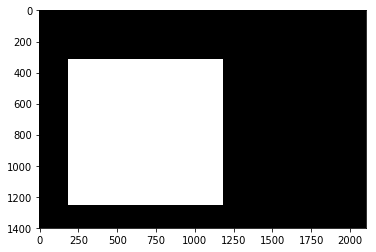

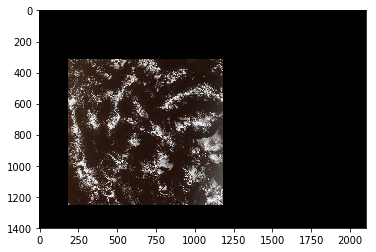

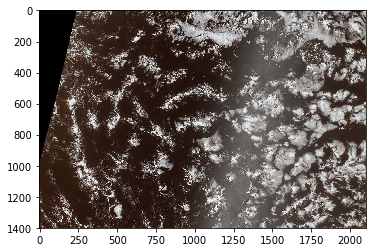

In [13]:
plt.imshow(mask)
plt.show()

plt.imshow(new_image)
plt.show()

plt.imshow(image)
plt.show()

In [14]:
print(mask)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
